# Python Assignment 2

 ECE 7995_1801_003: Detection and Estimation 
 Submitted By: Prabhjot Kaur

In [1]:
import numpy as np
from scipy import linalg
from sklearn import datasets

import matplotlib.pyplot as plt

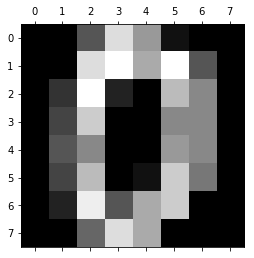

This image belongs to class 0


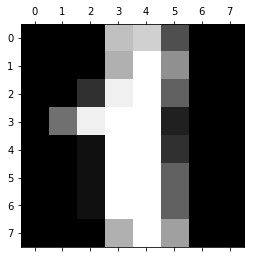

This image belongs to class 1


In [86]:
#### Q1 Load the digits dataset by importing the load_digits library from sklearn.datasets.
#       After loading the dataset, display an image from the first two classes "0" and "1".

digits = datasets.load_digits()

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 
print("This image belongs to class", digits.target[0])

plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()
print("This image belongs to class", digits.target[1])

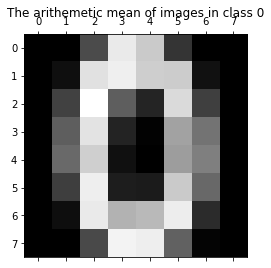

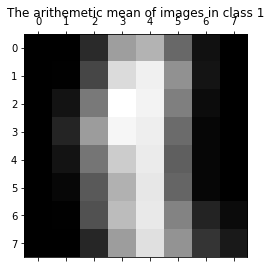

In [87]:
#### Q2 You are going to build detectors that work on Gaussian distributions, where the model parameters are derived from the MNIST images. 
#       First, compute the arithmetic mean of the images in class 0 and class 1 of the dataset. 
#       Store the result in arrays called mu_0 and mu_1, respectively. 
#       Plot these means as 8x8 images. Do they look like digits of the corresponding class?

digits = datasets.load_digits()
#print(digits.data.shape)

count_cl0 =0
count_cl1 =0
sum_cl0 = 0
sum_cl1 = 0
for i in range(0, digits.data.shape[0]):
    if digits.target[i] == 0:
        count_cl0 = count_cl0 + 1
        sum_cl0 = sum_cl0 + digits.images[i]
    elif digits.target[i] == 1:
        count_cl1 = count_cl1 + 1;
        sum_cl1 = sum_cl1 + digits.images[i]
        
mu_0 = sum_cl0/count_cl0
mu_1 = sum_cl1/count_cl1

plt.gray() 
plt.matshow(mu_0)
plt.title('The arithemetic mean of images in class 0')
plt.show() 


plt.gray() 
plt.matshow(mu_1) 
plt.title('The arithemetic mean of images in class 1')
plt.show()


In [ ]:
## Yes, the arithemetic mean looks like the digits from classes 0 and 1,respectively. 

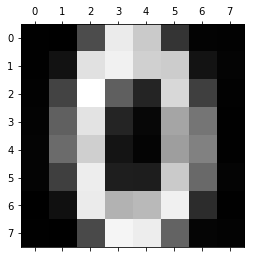

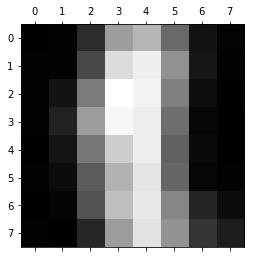

In [4]:
#### Q3: Now, you'll build up the Gaussian likelihood functions. 
#        Define a variable sigma_2, and let the likelihood functions be p(y|H=0) = N(mu_0,sigma_2*I) and p(y|H=1) = N(mu_1,sigma_2*I). 
#        For any value of sigma_2>0 you like, generate and plot a sample from the two distributions.

sigma_2 = 0.005

mu_0 = np.reshape(mu_0,-1)   #convert matrix mu_0 to a vector. This is the mean of samples in class 0 
cov_0 = np.dot(sigma_2,np.eye(mu_0.shape[0])) # Covaraince for samples in class 0
rand_multiVar_Gauss_0 = np.random.multivariate_normal(mu_0,cov_0, 1) #draw one random sample from this distribution 
rand_multiVar_Gauss_matrix_0 = np.reshape(rand_multiVar_Gauss_0,[int(np.sqrt(np.shape(rand_multiVar_Gauss_0)[1])),int(np.sqrt(np.shape(rand_multiVar_Gauss_0)[1]))]) #convert vector to a matrix for plotting
plt.gray() 
plt.matshow(rand_multiVar_Gauss_matrix_0) 
plt.show()


mu_1 = np.reshape(mu_1,-1)   #convert matrix mu_1 to a vector. This the mean of samples in class 1 
cov_1 = np.dot(sigma_2,np.eye(mu_1.shape[0])) # Covaraince for samples in class 1
rand_multiVar_Gauss_1 = np.random.multivariate_normal(mu_1,cov_1, 1) #draw one random sample from this distribution
rand_multiVar_Gauss_matrix_1 = np.reshape(rand_multiVar_Gauss_1,[int(np.sqrt(np.shape(rand_multiVar_Gauss_1)[1])),int(np.sqrt(np.shape(rand_multiVar_Gauss_1)[1]))]) #convert vector to a matrix for plottingg
plt.gray() 
plt.matshow(rand_multiVar_Gauss_matrix_1) 
plt.show()


In [85]:
#### Q4 For sigma_2=1000, derive the Neyman-Pearson detector associated with the LLR nu=0. 
#       Draw 1000 samples from p(y|H=0), put them through the detector, and estimate the false-alarm probability. 
#       Repeat for 1000 samples from p(y|H=1) and the detection probability. Then, repeat for nu=500 and nu=-500.

sigma_2 = 1000;
sample_size = 1000
nu = 0  #v  -imples that eta = 1

cov_sig1000 = np.dot(sigma_2,np.eye(mu_0.shape[0])) # Covaraince for samples in class 0 and class 1 (case of same covariance)
rand_multiVar_Gauss_0_sig1000 = np.random.multivariate_normal(mu_0,cov_0_sig1000, sample_size) # this yields sample_size X 64 matrix
rand_multiVar_Gauss_1_sig1000 = np.random.multivariate_normal(mu_1,cov_0_sig1000, sample_size) # this yields sample_size X 64 matrix

# pass these samples through a detector, where the detector gives an output '0' if the sample <= nu and '1' if the sample is > nnu
var = np.dot(np.transpose(mu_1-mu_0),np.linalg.inv(cov_0_sig1000))

nu = np.arange(-500,501,1)
Pfa_H0 = np.zeros(nu.size)    
Pd_H1 = np.zeros(nu.size)

for j in range(0, nu.size):
    for k in range(0, sample_size):
        compare_0 = np.dot(var,rand_multiVar_Gauss_0_sig1000[k, :])
        if compare_0 > nu[j]:
            Pfa_H0[j] = (Pfa_H0[j]) + 1/sample_size
        
    for l in range(0, sample_size):
        compare_1 = np.dot(var,rand_multiVar_Gauss_1_sig1000[l, :])
        if compare_1 > nu[j]:
            Pd_H1[j] = (Pd_H1[j]) + 1/sample_size 

print('For sigma_2 = 1000: ')
print('The false alarm probability and detection probability associated with threshold =', nu[0],'are:',Pfa_H0[0],'and',Pd_H1[0],',respectively')
print('The false alarm probability and detection probability associated with threshold =', nu[-1],'are:',Pfa_H0[-1],'and',Pd_H1[-1],',respectively')
print('The false alarm probability and detection probability associated with threshold =', nu[500],'are:',Pfa_H0[500],'and',Pd_H1[500],',respectively')




For sigma_2 = 1000: 
The false alarm probability and detection probability associated with threshold = -500 are: 1.0 and 1.0 ,respectively
The false alarm probability and detection probability associated with threshold = 500 are: 0.0 and 0.0 ,respectively
The false alarm probability and detection probability associated with threshold = 0 are: 0.262 and 0.729 ,respectively


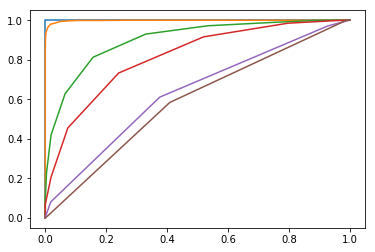

In [83]:
#### Q5 For noise variances sigma_2 = {10,100,500,1000,5000,10000}, numerically compute and plot the ROC curve. 
#       Do this by computing P_fa and P_d for a range of threshold values as in part (4), 
#       and plotting the resulting (P_fa,P_d) points on an axis. 
#       You will need to experiment with the range of threshold values to get a nice plot.

sigma_2 = np.array([10,100,500,1000,5000,10000])
sample_size = 1000
nu = np.arange(-500,500,1)  #range of threshold
Pfa_H0 = np.zeros((sigma_2.size, nu.size))    
Pd_H1 = np.zeros((sigma_2.size, nu.size))

for sigma in range(0,sigma_2.size):
    covarience = np.dot(sigma_2[sigma],np.eye(mu_0.shape[0])) # Covaraince for samples in class 0 and class 1 (case of same covariance)
    rand_multiVar_Gauss_0 = np.random.multivariate_normal(mu_0,covarience, sample_size) # this yields sample_size X 64 matrix
    rand_multiVar_Gauss_1 = np.random.multivariate_normal(mu_1,covarience, sample_size) # this yields sample_size X 64 matrix
    
    # pass these samples through a detector, where the detector gives an output '0' if the sample <= nu and '1' if the sample is > nn
    var = np.dot(np.transpose(mu_1-mu_0),np.linalg.inv(covarience))
    
    for j in range(0, nu.size):
        for k in range(0, sample_size):
            compare_0 = np.dot(var,rand_multiVar_Gauss_0[k, :])
            if compare_0 > nu[j]:
                Pfa_H0[sigma,j] = (Pfa_H0[sigma,j]) + 1/sample_size
                
        for l in range(0, sample_size):
            compare_1 = np.dot(var,rand_multiVar_Gauss_1[l, :])
            if compare_1 > nu[j]:
                Pd_H1[sigma,j] = (Pd_H1[sigma,j]) +1/sample_size

plt.plot(Pfa_H0[0, :],Pd_H1[0,:],Pfa_H0[1, :],Pd_H1[1,:],Pfa_H0[2, :],Pd_H1[2,:],Pfa_H0[3, :],Pd_H1[3,:],Pfa_H0[4, :],Pd_H1[4,:],Pfa_H0[5, :],Pd_H1[5,:])
plt.show()